# Welcome to the Demo Notebook

This notebook accompanies our paper submitted to the VLDB Journal, presenting our experimental findings and the reproducibility of our results. We aim to provide a comprehensive guide that walks you through the steps necessary to replicate our study, including code execution, data analysis, and visualization of results. Please follow along to explore the methodologies and insights discussed in our paper.

**Note**: Ensure you have installed all required libraries before running the code cells.

In [103]:
!pip install -U seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\seaborn-0.11.2.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [104]:
import pandas as pd 
import numpy as np
import matplotlib as mtp
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from colour import Color

# %matplotlib notebook
%matplotlib inline
red = Color("red").hex
green = Color("green").hex
blue = Color("blue").hex
black = Color("black").hex
grey = Color("grey").hex
colorch="#00802b"
colorgr="#3366cc"
rlcolor="black"
colorred="#FF0000"
sns.set_theme(style="ticks", palette="colorblind")
sns.set_context("paper")
palette = sns.color_palette("colorblind")
lwi = 0.75
wid = 0.75
thickLine = 1
thinLine = 0
msize = 30
mtsize = 10
c_palette = palette

## Data Loading and Visualization for Simple Linear TGDs

In this section, we initiate the process by importing experimental data from a CSV file, specifically focused on Simple Linear Tuple-Generating Dependencies (TGDs). Subsequently, we will delve into visualizing our research findings through several figures, aiming to elucidate the critical insights derived from our analysis on Simple Linear TGDs.

In [105]:
d = pd.read_csv("simple-linear.csv")

d['t_graph_component'] = d['t_graph'] + d['t_component']
d['t_graph_component_sec'] = d['t_graph_component'] /1000
d['t_graph_sec'] = d['t_graph'] /1000
d['t_component_sec'] = d['t_component'] /1000
d = d.loc[d["arity_profile"] == "[1-5]"]
d['n_rules_round'] = np.floor(d['n_rule']/100000) * 100000
d['t_parse_sec'] = d['t_parse']/1000
d['t_total_sec'] = d['t_graph_component_sec'] + d['t_parse_sec']
d1 = d.loc[d["predicate_profile"] == " [5-200)"]
d2 = d.loc[d["predicate_profile"] == " [200-400)"]
d3 = d.loc[d["predicate_profile"] == " [400-600]"]
d.loc[d["predicate_profile"] == " [5-200)"]
d11 = d1.loc[d1["rule_profile"] == " [0-333333)"]
d12 = d1.loc[d1["rule_profile"] == " [333333-666666)"]
d13 = d1.loc[d1["rule_profile"] == " [666666-999999)"]

Now plotting figures for simple linear tgds

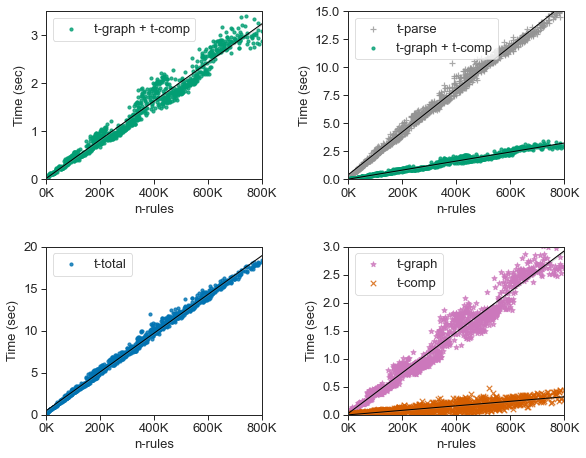

In [106]:
def plot_subplot(ax, data, x, y, scatter_kws, line_kws, label, marker, xlim, ylim, ylabel='Time (sec)', fontsize=12, 
                 extra_y=None, extra_scatter_kws=None, extra_line_kws=None, extra_label=None, extra_marker=None):
    # Plot the first scatterplot
    sns.regplot(ax=ax, data=data, x=x, y=y,
                scatter_kws=scatter_kws, line_kws=line_kws, marker=marker, label=label)
    # Check if an additional scatterplot is required and plot it on the same ax
    if extra_y is not None:
        sns.regplot(ax=ax, data=data, x=x, y=extra_y,
                    scatter_kws=extra_scatter_kws, line_kws=extra_line_kws, marker=extra_marker, label=extra_label)
    
    ax.legend(fontsize=fontsize)
    ax.set_xlabel('n-rules', fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    # Set specific x-ticks and labels, with labels horizontal
    xticks = [0, 200000, 400000, 600000, 800000]
    ax.set_xticks(xticks)
    xlabels = ['{}K'.format(int(x/1000)) for x in xticks]
    ax.set_xticklabels(xlabels, rotation=0, fontsize=fontsize)

# Adjusted figure size and axes setup
fig, axs = plt.subplots(2, 2, figsize=(9, 7))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

fontsize = 13  # Adjust the font size as needed

# Assuming variables like 'd', 'palette', 'black', 'thickLine', 'mtsize', 'msize' are predefined
# Calls to the function for each subplot, including those requiring two scatterplot series
plot_subplot(axs[0, 0], d, 'n_rules', 't_graph_component_sec', 
             {"s": mtsize, "color": palette[2]}, {"color": black, "lw": thickLine}, 
             't-graph + t-comp', 'o', (0, 800000), (0, 3.5), fontsize=fontsize)

# Second plot with two scatterplots
plot_subplot(axs[0, 1], d, 'n_rules', 't_parse_sec', 
             {"s": msize, "color": palette[7]}, {"color": black, "lw": thickLine}, 
             't-parse', '+', (0, 800000), (0, 15), fontsize=fontsize,
             extra_y='t_graph_component_sec', extra_scatter_kws={"s": mtsize, "color": palette[2]}, 
             extra_line_kws={"color": black, "lw": thickLine}, extra_label='t-graph + t-comp', extra_marker='o')

plot_subplot(axs[1, 0], d, 'n_rules', 't_total_sec', 
             {"s": mtsize, "color": palette[0]}, {"color": black, "lw": thickLine}, 
             't-total', 'o', (0, 800000), (0, 20), fontsize=fontsize)

# Fourth plot with two scatterplots
plot_subplot(axs[1, 1], d, 'n_rules', 't_graph_sec', 
             {"s": msize, "color": palette[4]}, {"color": black, "lw": thickLine}, 
             't-graph', '*', (0, 800000), (0, 3), fontsize=fontsize,
             extra_y='t_component_sec', extra_scatter_kws={"s": msize, "color": palette[3]}, 
             extra_line_kws={"color": black, "lw": thickLine}, extra_label='t-comp', extra_marker='x')

plt.show()

## Experimental Results and Demonstration for Linear TGDs

In this part of the notebook, we proceed to load experimental data from a CSV file, concentrating on Linear Tuple-Generating Dependencies (TGDs). The objective is to incorporate and visualize the experimental outcomes, with a focus on understanding the dynamics and implications of Linear TGDs through various plots and analyses. This will help us to highlight significant findings and insights obtained from our exploration of Linear TGDs.

In [107]:
dm = pd.read_csv("linear-db.csv")
dm['nodes_edges'] = dm['n_edges'] + dm['n_nodes']
dm['nodes_edges_d'] = dm['n_edges_d'] + dm['n_nodes_d']
dm['graph_rules'] = dm['nodes_edges'] + dm['n_rules']
dm['t_graph_component'] = dm['t_graph'] + dm['t_component']
dm['ratio']=dm['n_rules']/dm['nodes_edges']
dm['ratio_d']=dm['n_rules']/dm['nodes_edges_d']
dm['t_shapes_q_sec']=dm['t_shapes_q']/1000
dm['t_shapes_sec']=dm['t_shapes']/1000
dm['db'] = dm['db_size']/1000
dm['db'] = [str(int(i))+'K' for i in dm['db']]
dm['t_graph_component'] = dm['t_graph'] + dm['t_component']
dm['t_graph_component_sec']=dm['t_graph_component']/1000
dp1 = dm.loc[dm["predicate_profile"] == " [5-200)"]
dp2 = dm.loc[dm["predicate_profile"] == " [200-400)"]
dp3 = dm.loc[dm["predicate_profile"] == " [400-600]"]

Now plotting figures for linear tgds, starting from the experiments for finding shapes in database.

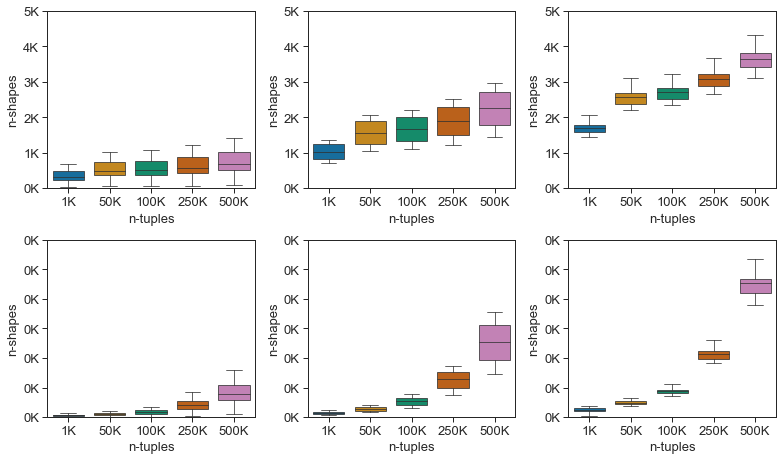

In [108]:
def setup_boxplot(ax, data, x, y, xlabel, ylabel, width, linewidth, ylim, dpi=600, yticklabels_suffix='K', fontsize=18):
    sns.boxplot(ax=ax, data=data, x=x, y=y, width=width, linewidth=linewidth, showfliers=False)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_ylim(ylim)
    
    # Set custom y-tick labels with specified suffix and adjust font size
    ylabels = ['{:,.0f}'.format(y) + yticklabels_suffix for y in ax.get_yticks()/1000]
    ax.set_yticklabels(ylabels, fontsize=fontsize)
    
    # Optionally, adjust x-tick labels font size if needed
    for label in ax.get_xticklabels():
        label.set_fontsize(fontsize)

# Setup the figure layout
fig, axs = plt.subplots(2, 3, figsize=(11, 6.5))  # Adjusted for 3 plots per row
plt.subplots_adjust(left=0.3, bottom=0.35, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Define the parameters for each plot
plot_params = [
    (dp1, 'n_shapes', (0, 5000)),
    (dp2, 'n_shapes', (0, 5000)),
    (dp3, 'n_shapes', (0, 5000)),
    (dp1, 't_shapes_q_sec', (0, ymax)),
    (dp2, 't_shapes_q_sec', (0, ymax)),
    (dp3, 't_shapes_q_sec', (0, ymax))
]

# Plot each figure
for ax, (data, y, ylim) in zip(axs.flat, plot_params):
    setup_boxplot(ax, data, 'db', y, 'n-tuples', 'n-shapes', lwi, wid, ylim, fontsize=13)

plt.tight_layout()
plt.show()

The code below generates a figure showing the average time to construct dependency graphs for databases of various sizes with linear TGDs and identify special strongly connected components.

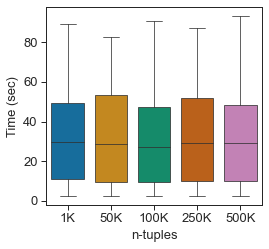

In [109]:
def plot_and_save_boxplot(data, x, y, xlabel, ylabel, width, linewidth, figsize=(6, 6), dpi=600, showfliers=False, ylim=None, fontsize=18):
    plt.figure(figsize=figsize)
    ax = sns.boxplot(data=data, x=x, y=y, width=width, linewidth=linewidth, showfliers=showfliers)
    
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.tick_params(axis='both', labelsize=fontsize)  # Set font size for tick labels
    
    if ylim is not None:
        ax.set_ylim(ylim)
    
    plt.subplots_adjust(left=0.3, bottom=0.35, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    plt.show()

# Assuming 'dm', 'lwi', 'wid' are predefined along with their respective values
plot_and_save_boxplot(
    data=dm, 
    x='db', 
    y='t_graph_component_sec', 
    xlabel='n-tuples', 
    ylabel='Time (sec)', 
    width=lwi, 
    linewidth=wid, 
    figsize=(5, 5),  # Adjusted figure size
    fontsize=13  # Specify font size here
)


Preparing data for the experiments about termiantion checking in linear TGDs.

In [110]:
d = pd.read_csv("linear.csv")
c_palette = sns.color_palette("colorblind")
d['t_graph_component'] = d['t_graph'] + d['t_component']
d['t_graph_component_sec'] = d['t_graph_component'] /1000
d['t_graph_sec'] = d['t_graph'] /1000
d['t_component_sec'] = d['t_component'] /1000
d['nodes_edges_d'] = d['n_edges_d'] + d['n_nodes_d']
d['n_rules_round'] = np.floor(d['n_rules']/100000) * 100000
d['t_parse_sec'] = d['t_parse']/1000
d['t_total_sec'] = d['t_graph_component_sec'] + d['t_parse_sec']
d = d.loc[d["arity_profile"] == "[1-5]"]
d1 = d.loc[d["predicate_profile"] == " [5-200)"]
d2 = d.loc[d["predicate_profile"] == " [200-400)"]
d3 = d.loc[d["predicate_profile"] == " [400-600]"]

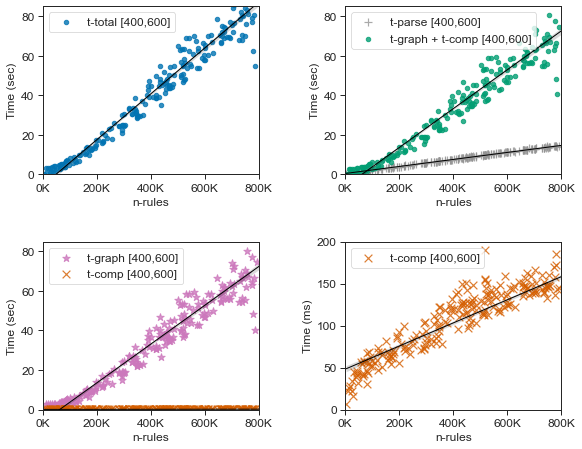

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_subplot(ax, data, x, y, scatter_kws, line_kws, label, marker, xlim, ylim, xlabel, ylabel, fontsize=14,
                 extra_y=None, extra_scatter_kws=None, extra_line_kws=None, extra_label=None, extra_marker=None, dpi=600):
    sns.regplot(ax=ax, data=data, x=x, y=y,
                scatter_kws=scatter_kws, line_kws=line_kws, marker=marker, label=label)
    if extra_y is not None:
        sns.regplot(ax=ax, data=data, x=x, y=extra_y,
                    scatter_kws=extra_scatter_kws, line_kws=extra_line_kws, marker=extra_marker, label=extra_label)

    ax.legend(fontsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.tick_params(axis='both', labelsize=fontsize)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    xticks = ax.get_xticks()
    ax.set_xticks(xticks)  # Ensure x-ticks are set to include all desired points
    xlabels = ['{:,.0f}'.format(x) + 'K' for x in xticks/1000]
    ax.set_xticklabels(xlabels, rotation=0, fontsize=fontsize)

# Setup the figure layout for a 2x2 grid with increased figure size
fig, axs = plt.subplots(2, 2, figsize=(9, 7))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

fontsize = 12# Adjust the font size as needed

# Assuming variables like 'd3', 'palette', 'black', 'thickLine', 'mtsize', 'msize' are predefined
# Update calls to the function for each subplot, adjusting for your dataset and preferences
plot_subplot(axs[0, 0], d3, 'n_rules', 't_total_sec', 
             {"s": mtsize*2, "color": palette[0]}, {"color": black, "lw": thickLine}, 
             't-total [400,600]', 'o', (0, 800000), (0, 85), 'n-rules', 'Time (sec)', fontsize=fontsize)

plot_subplot(axs[0, 1], d3, 'n_rules', 't_parse_sec', 
             {"s": msize*2, "color": palette[7]}, {"color": black, "lw": thickLine}, 
             't-parse [400,600]', '+', (0, 800000), (0, 85), 'n-rules', 'Time (sec)', fontsize=fontsize,
             extra_y='t_graph_component_sec', extra_scatter_kws={"s": mtsize*2, "color": palette[2]}, 
             extra_line_kws={"color": black, "lw": thickLine}, extra_label='t-graph + t-comp [400,600]', extra_marker='o')

plot_subplot(axs[1, 0], d3, 'n_rules', 't_graph_sec', 
             {"s": msize*2, "color": palette[4]}, {"color": black, "lw": thickLine}, 
             't-graph [400,600]', '*', (0, 800000), (0, 85), 'n-rules', 'Time (sec)', fontsize=fontsize,
             extra_y='t_component_sec', extra_scatter_kws={"s": msize*2, "color": palette[3]}, 
             extra_line_kws={"color": black, "lw": thickLine}, extra_label='t-comp [400,600]', extra_marker='x')

plot_subplot(axs[1, 1], d3, 'n_rules', 't_component', 
             {"s": msize*2, "color": palette[3]}, {"color": black, "lw": thickLine}, 
             't-comp [400,600]', 'x', (0, 800000), (0, 200), 'n-rules', 'Time (ms)', fontsize=fontsize)

plt.show()